In [1]:
library(fma)
library(fpp)
library(forecast)

Loading required package: tseries
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: expsmooth
Loading required package: lmtest


In [2]:
ds_full = visitors
start(visitors)
end(visitors)

[1] 1985    5

[1] 2005    4

## 3a)

December is peak, May is lowest. Pretty steady upward trend, other than May 2003.

The following article explains May 2003 in New Zealand (I know this data is Australia, but really what's the difference?????)

http://www.scoop.co.nz/stories/BU0306/S00222/visitor-arrivals-drop-13-percent.htm

Warning message in window.default(x, ...):
“'end' value not changed”

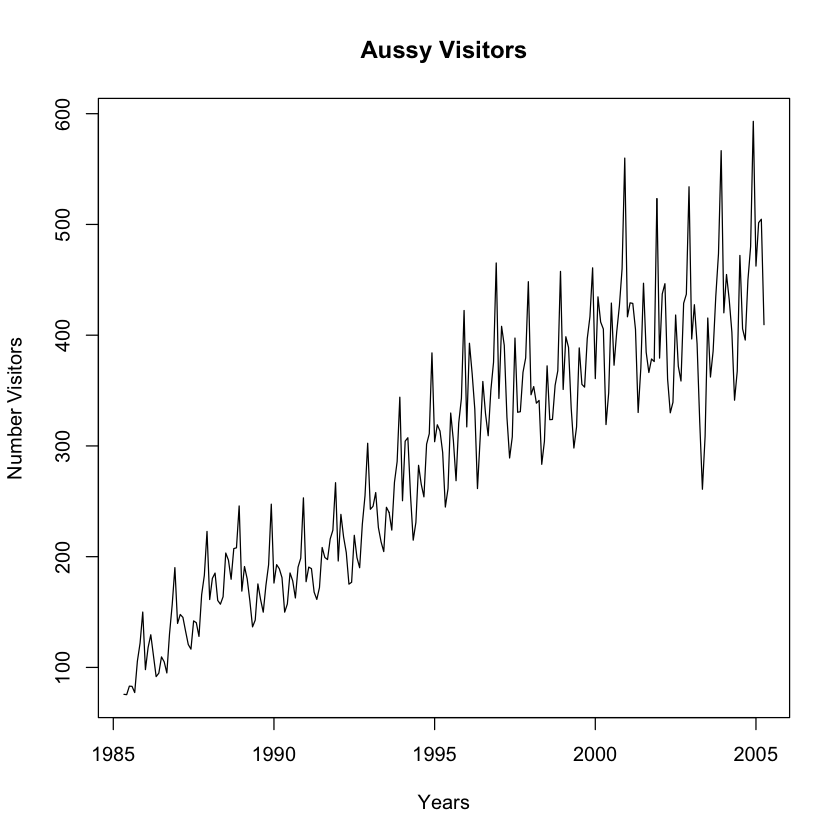

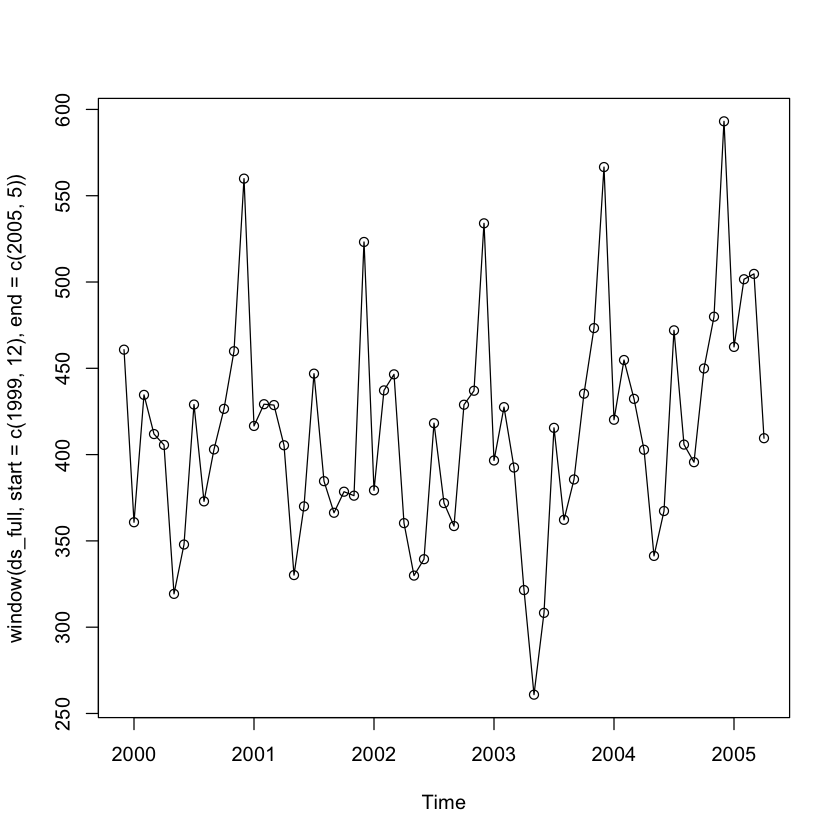

In [3]:
plot(ds_full, main="Aussy Visitors", xlab="Years", ylab="Number Visitors")
plot(window(ds_full, start=c(1999, 12), end=c(2005, 5)), type="o")

Warning message in window.default(x, ...):
“'start' value not changed”Warning message in window.default(x, ...):
“'end' value not changed”

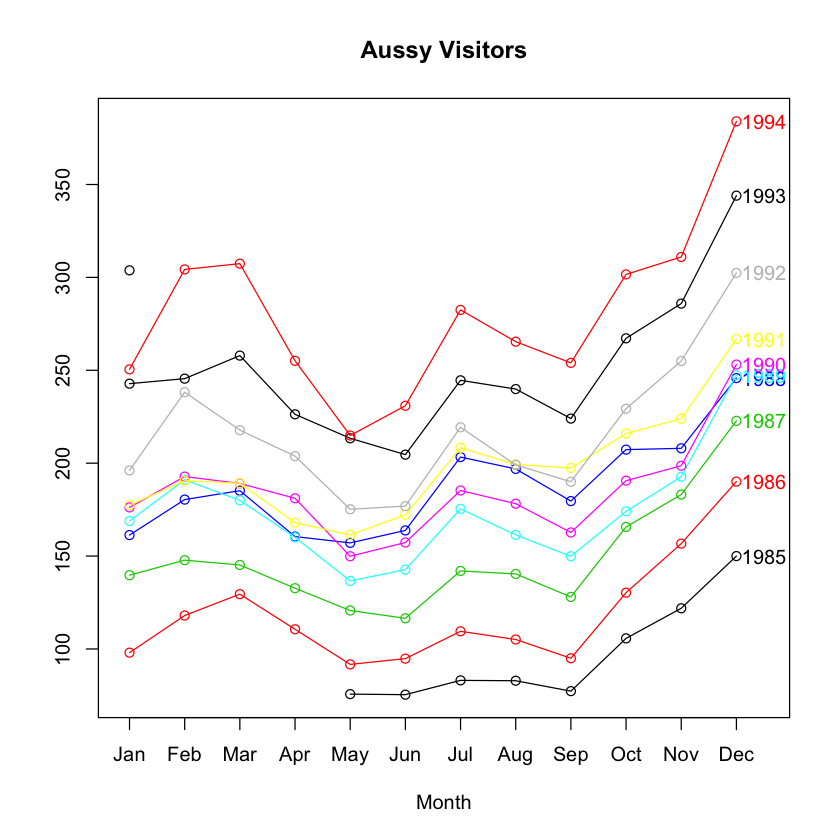

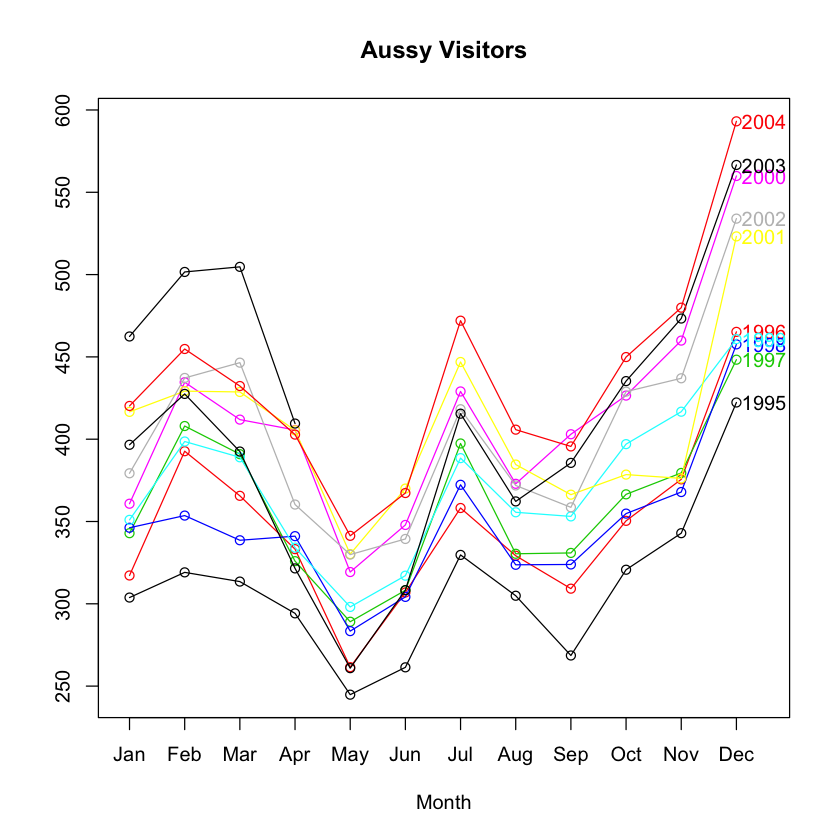

In [4]:
seasonplot(window(ds_full, start=1985, end=1995), year.labels=TRUE, col=1:10, main="Aussy Visitors")
seasonplot(window(ds_full, start=1995, end=2006), year.labels=TRUE, col=1:10, main="Aussy Visitors")

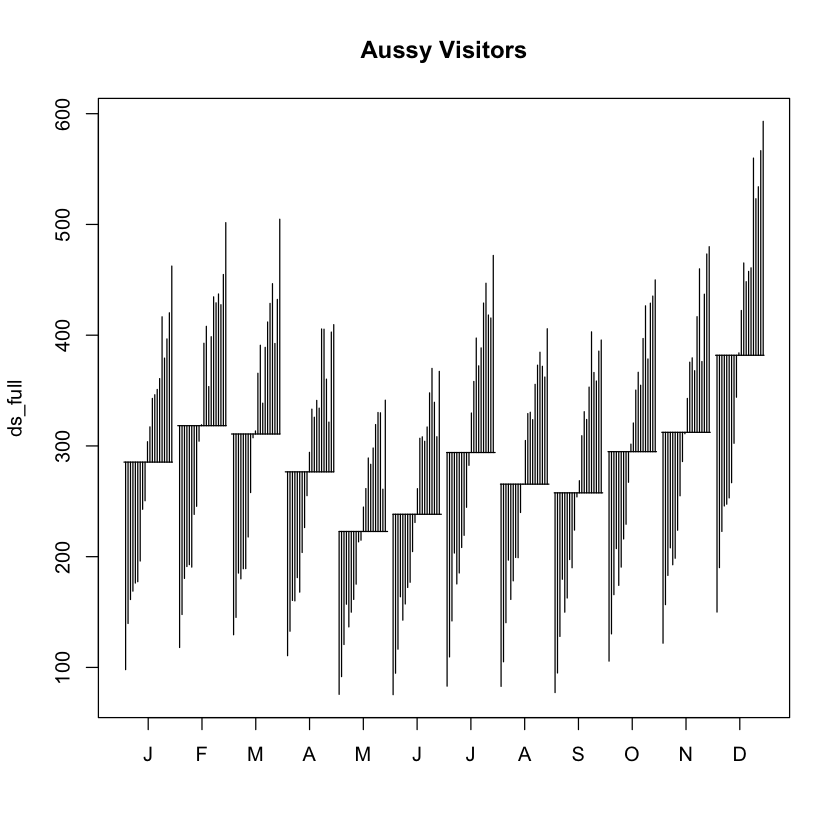

In [5]:
monthplot(ds_full, main="Aussy Visitors", type="h")

## 3b) HW Multiplicative Model

We need multiplicative here because the seasonal peaks and valleys are getting bigger through the years, they are not just linear (additive)

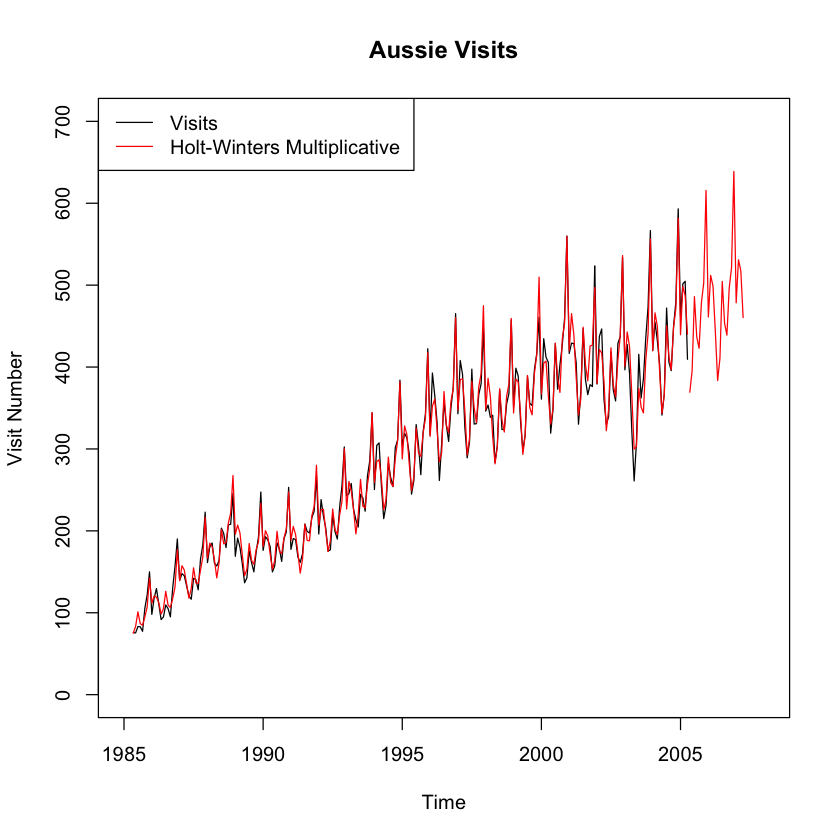

In [6]:
hw_mult = hw(ds_full, seasonal="multiplicative", h=24)

plot(ds_full, main="Aussie Visits", xlim=c(1985, 2008), ylim=c(0, 700), ylab="Visit Number", xlab="Time")

# Plot the fitted values to original
lines(fitted(hw_mult), col="red")
# Plot the forecasted values
lines(hw_mult$mean, col="red")

legend("topleft"
       , lty=1
       , col=c("black", "red")
       , c("Visits", "Holt-Winters Multiplicative")
       )

## 3c) Variations - Dampening

First choosing to dampen because the gaining trend just cannot go on forever.

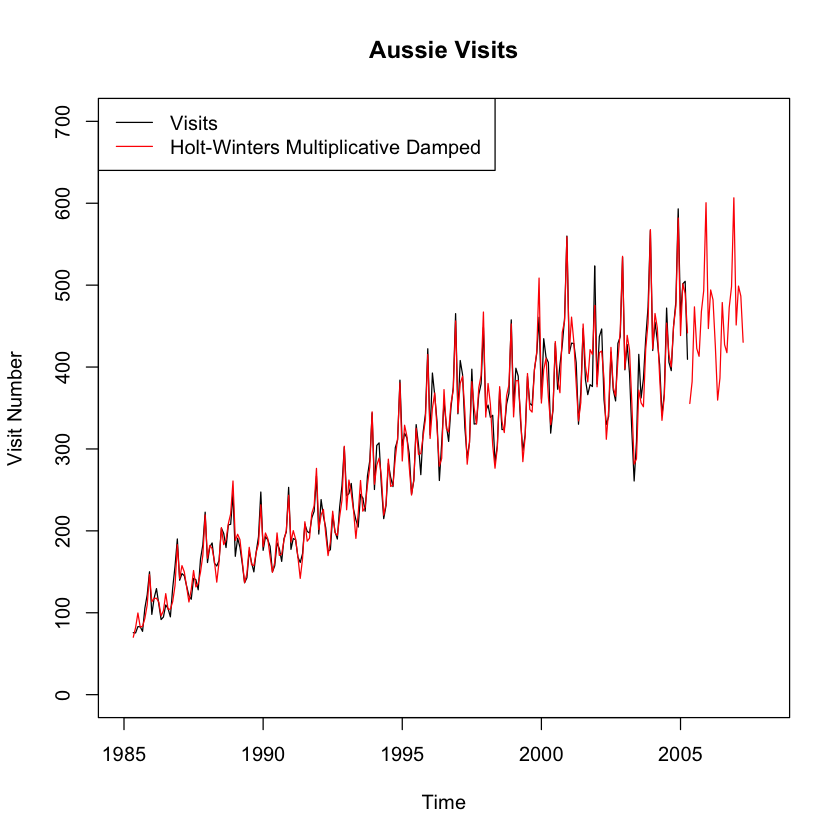

In [7]:
hw_mult_damp = hw(ds_full, seasonal="multiplicative", damped=TRUE, h=24)

plot(ds_full, main="Aussie Visits", xlim=c(1985, 2008), ylim=c(0, 700), ylab="Visit Number", xlab="Time")

# Plot the fitted values to original
lines(fitted(hw_mult_damp), col="red")
# Plot the forecasted values
lines(hw_mult_damp$mean, col="red")

legend("topleft"
       , lty=1
       , col=c("black", "red")
       , c("Visits", "Holt-Winters Multiplicative Damped")
       )

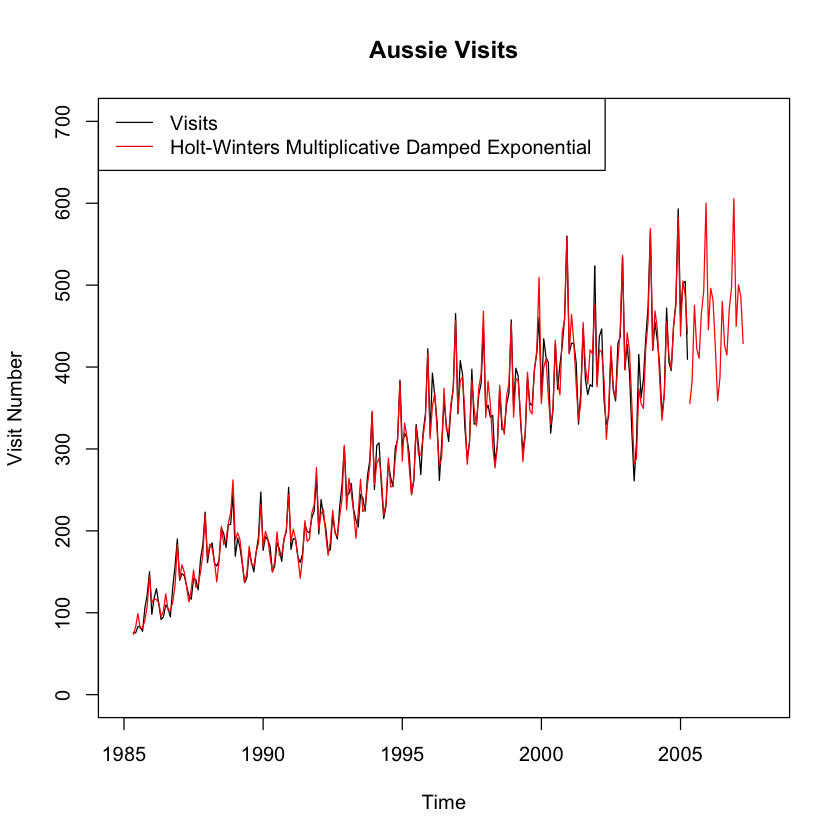

In [8]:
hw_mult_damp_exp = hw(ds_full, seasonal="multiplicative", damped=TRUE, exponential=TRUE, h=24)

plot(ds_full, main="Aussie Visits", xlim=c(1985, 2008), ylim=c(0, 700), ylab="Visit Number", xlab="Time")

# Plot the fitted values to original
lines(fitted(hw_mult_damp_exp), col="red")
# Plot the forecasted values
lines(hw_mult_damp_exp$mean, col="red")


legend("topleft"
       , lty=1
       , col=c("black", "red")
       , c("Visits", "Holt-Winters Multiplicative Damped Exponential")
       )

## 3d) RMSE


In [13]:
rmse_mult = format(round(accuracy(hw_mult)[2], 2), nsmall=2)
rmse_mult_damp = format(round(accuracy(hw_mult_damp)[2], 2), nsmall=2)
rmse_mult_damp_exp = format(round(accuracy(hw_mult_damp_exp)[2], 2), nsmall=2)
data.frame(Model = c("Mult", "Mult Damp", "Mult Damp Exp"), RMSE = c(rmse_mult, rmse_mult_damp, rmse_mult_damp_exp))

Model,RMSE
Mult,14.83
Mult Damp,14.45
Mult Damp Exp,14.46


## 3e) ETS

Looks like ETS is choosing Additive Holt-Winters Damped

In [14]:
ets = ets(ds_full)

In [15]:
summary(ets)

ETS(M,A,M) 

Call:
 ets(y = ds_full) 

  Smoothing parameters:
    alpha = 0.6567 
    beta  = 0.0012 
    gamma = 0.1712 

  Initial states:
    l = 87.2703 
    b = 2.6226 
    s=0.9407 1.063 1.0656 0.9699 1.366 1.107
           1.003 0.8324 0.9317 0.9993 0.8619 0.8595

  sigma:  0.0514

     AIC     AICc      BIC 
2598.980 2601.419 2654.670 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -1.536043 15.86105 11.53405 -0.7017724 4.076346 0.4259416
                     ACF1
Training set -0.004687451
